# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

09:21:38 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=250586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=889202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=457501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=510230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

09:21:39 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=874116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=678152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

09:21:41 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=304293;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=482248;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

09:21:42 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=867995;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=525025;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

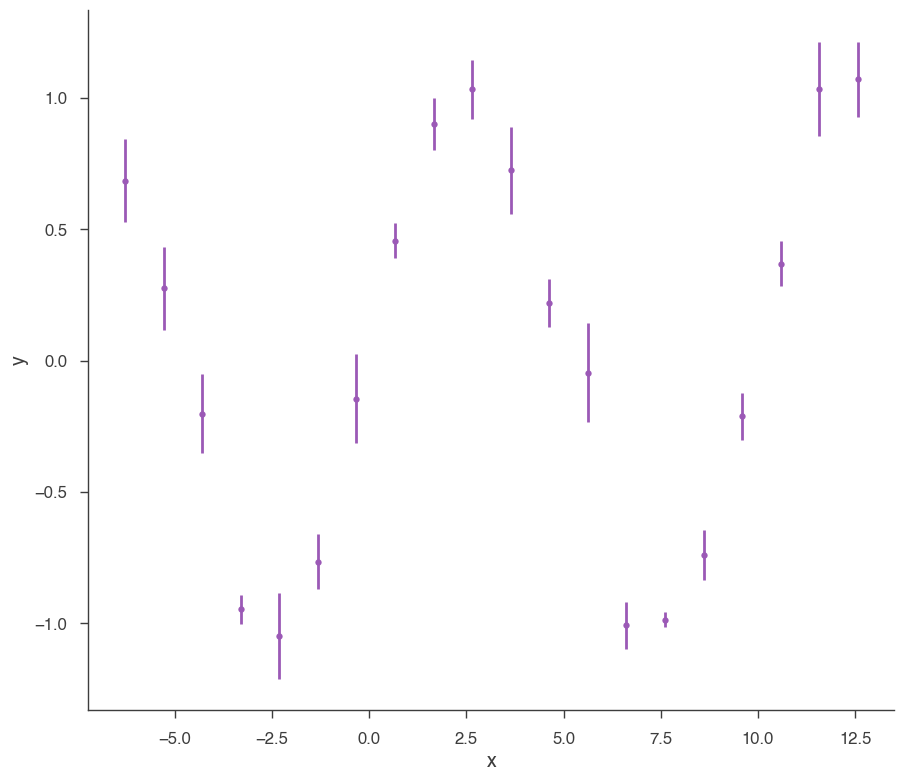

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=294037;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=660233;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

09:21:46 INFO      Mean acceptance fraction: 0.7111                                            ]8;id=945081;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=197089;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

09:21:47 INFO      fit restored to maximum of posterior                                         ]8;id=825144;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=664416;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=842095;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=561824;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.019 -0.022 +0.021,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.009 -0.009 +0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.294779
total,-6.294779


Values of statistical measures:

,statistical measures
AIC,17.295439
BIC,18.581022
DIC,16.489789
PDIC,1.949216


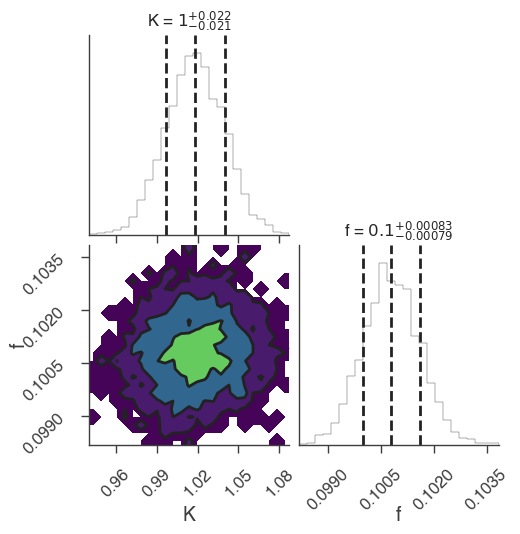

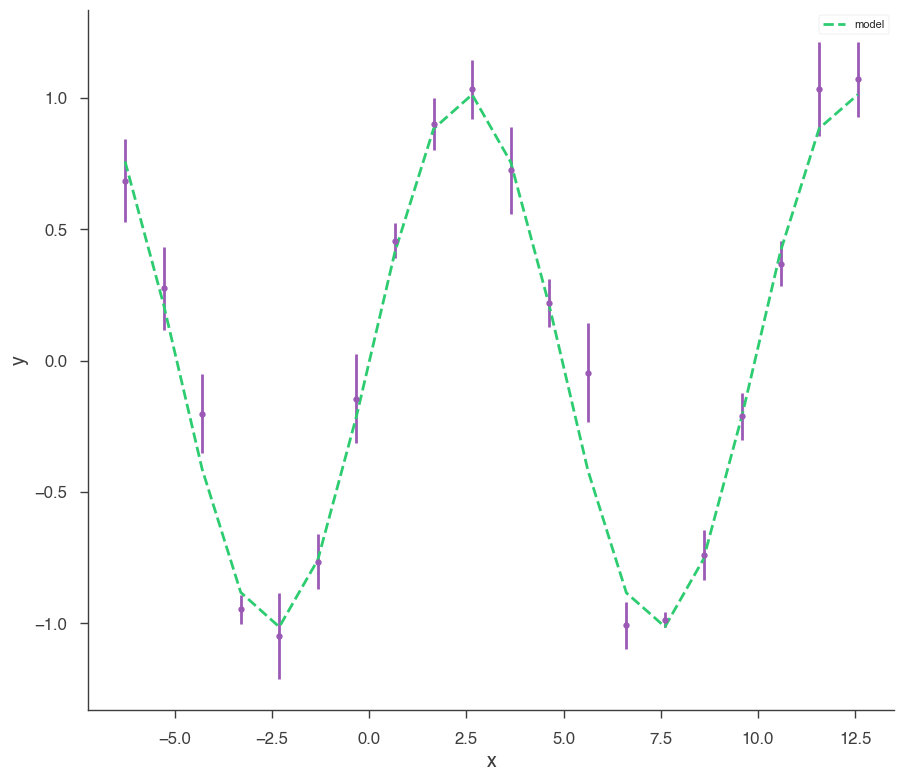

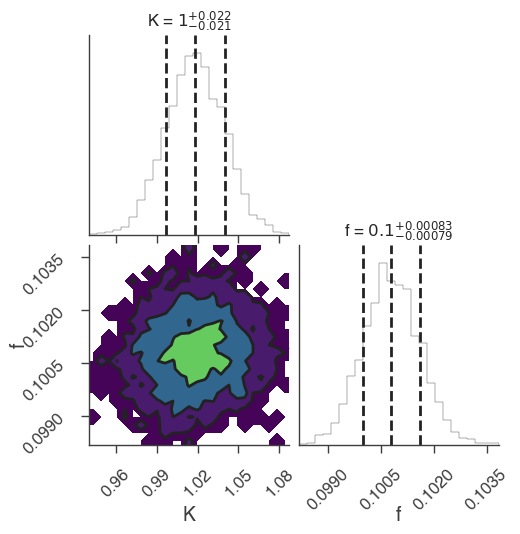

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

09:21:49 INFO      sampler set to multinest                                                ]8;id=507590;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=901099;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -14.512893787275122      +/-  0.13415417548339301     
 Total Likelihood Evaluations:         5117
 Sampling finished. Exiting MultiNest



09:21:50 INFO      fit restored to maximum of posterior                                         ]8;id=551989;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=252519;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=31012;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=36411;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.020 -0.024 +0.018,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.009 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.297484
total,-6.297484


Values of statistical measures:

,statistical measures
AIC,17.300850
BIC,18.586432
DIC,16.604360
PDIC,2.004538
log(Z),-6.302870


         INFO      deleting the chain directory chains                                     ]8;id=630356;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=918265;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

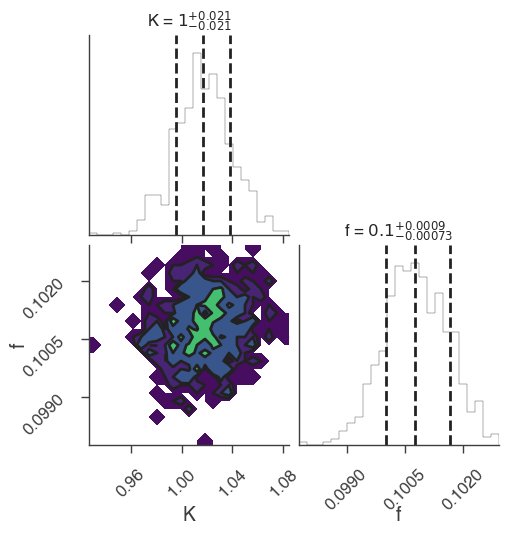

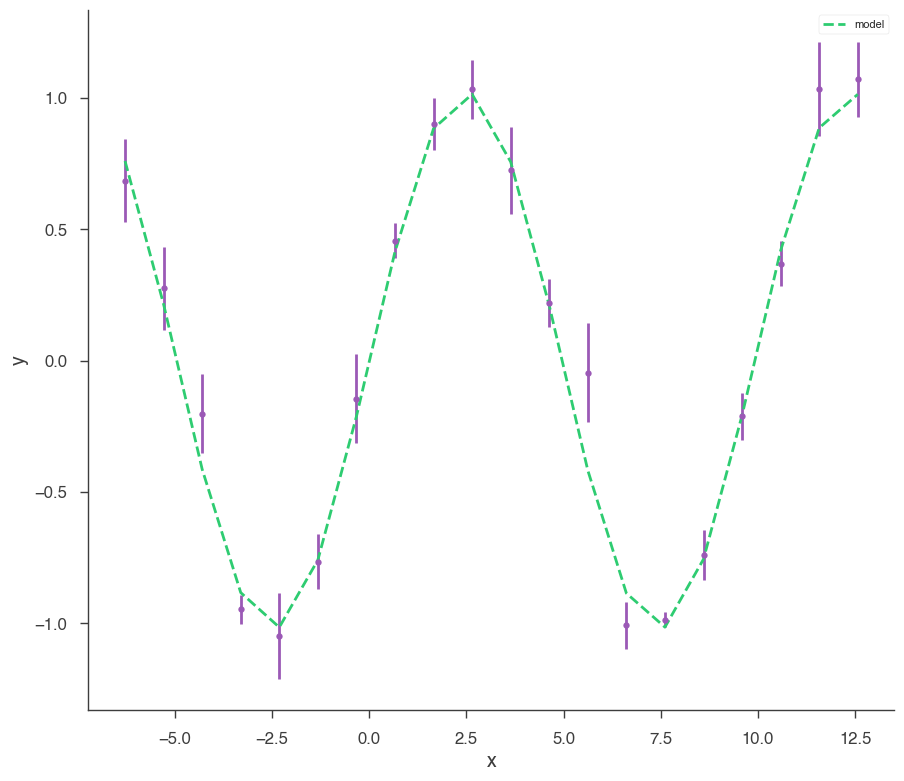

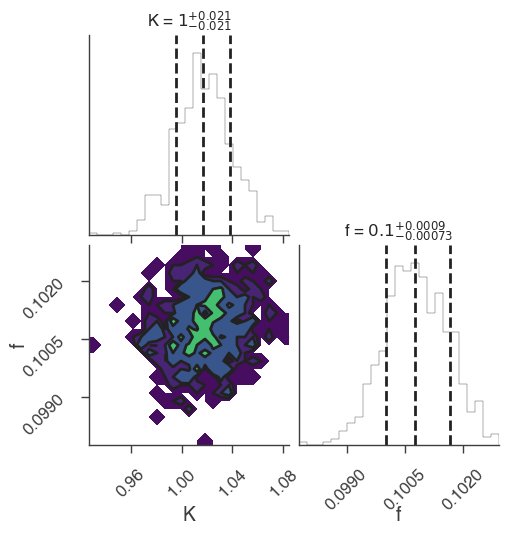

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

09:21:51 INFO      sampler set to dynesty_nested                                           ]8;id=34969;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=912787;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

129it [00:00, 1281.82it/s, bound: 0 | nc: 2 | ncall: 544 | eff(%): 23.713 | loglstar:   -inf < -2052.465 <    inf | logz: -2058.668 +/-  0.122 | dlogz: 2051.303 >  0.409]

258it [00:00, 1179.20it/s, bound: 0 | nc: 1 | ncall: 751 | eff(%): 34.354 | loglstar:   -inf < -1545.230 <    inf | logz: -1552.533 +/-  0.134 | dlogz: 1547.889 >  0.409]

377it [00:00, 936.72it/s, bound: 0 | nc: 1 | ncall: 1036 | eff(%): 36.390 | loglstar:   -inf < -1232.544 <    inf | logz: -1239.245 +/-  0.126 | dlogz: 1231.070 >  0.409]

476it [00:00, 843.44it/s, bound: 0 | nc: 5 | ncall: 1335 | eff(%): 35.655 | loglstar:   -inf < -1071.135 <    inf | logz: -1078.946 +/-  0.138 | dlogz: 1072.807 >  0.409]

564it [00:00, 789.00it/s, bound: 0 | nc: 5 | ncall: 1680 | eff(%): 33.571 | loglstar:   -inf < -987.228 <    inf | logz: -994.039 +/-  0.125 | dlogz: 985.040 >  0.409]   

645it [00:00, 706.78it/s, bound: 0 | nc: 5 | ncall: 2081 | eff(%): 30.995 | loglstar:   -inf < -916.610 <    inf | logz: -923.612 +/-  0.129 | dlogz: 914.398 >  0.409]

718it [00:00, 576.27it/s, bound: 0 | nc: 4 | ncall: 2469 | eff(%): 29.081 | loglstar:   -inf < -838.559 <    inf | logz: -846.723 +/-  0.137 | dlogz: 838.472 >  0.409]

780it [00:01, 491.63it/s, bound: 0 | nc: 16 | ncall: 2870 | eff(%): 27.178 | loglstar:   -inf < -784.114 <    inf | logz: -791.373 +/-  0.129 | dlogz: 781.700 >  0.409]

833it [00:01, 449.97it/s, bound: 0 | nc: 1 | ncall: 3306 | eff(%): 25.197 | loglstar:   -inf < -744.855 <    inf | logz: -752.440 +/-  0.129 | dlogz: 742.713 >  0.409] 

881it [00:01, 418.17it/s, bound: 0 | nc: 16 | ncall: 3647 | eff(%): 24.157 | loglstar:   -inf < -713.623 <    inf | logz: -720.622 +/-  0.125 | dlogz: 710.421 >  0.409]

924it [00:01, 412.80it/s, bound: 0 | nc: 9 | ncall: 3946 | eff(%): 23.416 | loglstar:   -inf < -687.670 <    inf | logz: -695.921 +/-  0.131 | dlogz: 686.115 >  0.409] 

966it [00:01, 387.98it/s, bound: 0 | nc: 5 | ncall: 4353 | eff(%): 22.192 | loglstar:   -inf < -555.743 <    inf | logz: -564.437 +/-  0.141 | dlogz: 555.151 >  0.409]

1006it [00:01, 305.55it/s, bound: 0 | nc: 4 | ncall: 4818 | eff(%): 20.880 | loglstar:   -inf < -474.896 <    inf | logz: -483.849 +/-  0.146 | dlogz: 477.279 >  0.409]

1039it [00:02, 248.96it/s, bound: 0 | nc: 11 | ncall: 5296 | eff(%): 19.619 | loglstar:   -inf < -400.958 <    inf | logz: -409.747 +/-  0.144 | dlogz: 402.514 >  0.409]

1067it [00:02, 218.66it/s, bound: 0 | nc: 32 | ncall: 5736 | eff(%): 18.602 | loglstar:   -inf < -346.497 <    inf | logz: -355.806 +/-  0.151 | dlogz: 350.407 >  0.409]

1091it [00:02, 197.38it/s, bound: 0 | nc: 7 | ncall: 6101 | eff(%): 17.882 | loglstar:   -inf < -318.914 <    inf | logz: -328.054 +/-  0.145 | dlogz: 320.859 >  0.409] 

1112it [00:02, 191.46it/s, bound: 0 | nc: 8 | ncall: 6423 | eff(%): 17.313 | loglstar:   -inf < -301.601 <    inf | logz: -310.496 +/-  0.143 | dlogz: 302.738 >  0.409]

1132it [00:02, 183.72it/s, bound: 0 | nc: 19 | ncall: 6768 | eff(%): 16.726 | loglstar:   -inf < -287.934 <    inf | logz: -296.891 +/-  0.143 | dlogz: 289.182 >  0.409]

1151it [00:02, 168.39it/s, bound: 0 | nc: 68 | ncall: 7184 | eff(%): 16.022 | loglstar:   -inf < -278.514 <    inf | logz: -286.829 +/-  0.137 | dlogz: 278.390 >  0.409]

1169it [00:03, 138.89it/s, bound: 0 | nc: 19 | ncall: 7731 | eff(%): 15.121 | loglstar:   -inf < -270.629 <    inf | logz: -278.750 +/-  0.132 | dlogz: 270.034 >  0.409]

1190it [00:03, 148.59it/s, bound: 0 | nc: 57 | ncall: 8038 | eff(%): 14.805 | loglstar:   -inf < -256.099 <    inf | logz: -264.933 +/-  0.139 | dlogz: 256.594 >  0.409]

1206it [00:03, 129.80it/s, bound: 0 | nc: 1 | ncall: 8417 | eff(%): 14.328 | loglstar:   -inf < -247.080 <    inf | logz: -255.106 +/-  0.132 | dlogz: 246.159 >  0.409] 

1220it [00:03, 131.57it/s, bound: 0 | nc: 24 | ncall: 8679 | eff(%): 14.057 | loglstar:   -inf < -239.166 <    inf | logz: -248.340 +/-  0.142 | dlogz: 240.064 >  0.409]

1234it [00:03, 123.84it/s, bound: 0 | nc: 15 | ncall: 8969 | eff(%): 13.759 | loglstar:   -inf < -233.425 <    inf | logz: -241.760 +/-  0.134 | dlogz: 232.851 >  0.409]

1254it [00:03, 140.57it/s, bound: 0 | nc: 32 | ncall: 9280 | eff(%): 13.513 | loglstar:   -inf < -220.376 <    inf | logz: -229.245 +/-  0.141 | dlogz: 220.667 >  0.409]

1269it [00:03, 126.05it/s, bound: 0 | nc: 32 | ncall: 9684 | eff(%): 13.104 | loglstar:   -inf < -211.573 <    inf | logz: -219.444 +/-  0.135 | dlogz: 210.302 >  0.409]

1283it [00:04, 112.79it/s, bound: 0 | nc: 7 | ncall: 10036 | eff(%): 12.784 | loglstar:   -inf < -206.897 <    inf | logz: -214.866 +/-  0.134 | dlogz: 205.701 >  0.409]

1295it [00:04, 105.85it/s, bound: 0 | nc: 15 | ncall: 10346 | eff(%): 12.517 | loglstar:   -inf < -201.915 <    inf | logz: -209.900 +/-  0.135 | dlogz: 200.670 >  0.409]

1306it [00:04, 93.37it/s, bound: 0 | nc: 4 | ncall: 10717 | eff(%): 12.186 | loglstar:   -inf < -196.863 <    inf | logz: -204.942 +/-  0.135 | dlogz: 195.731 >  0.409]  

1319it [00:04, 101.05it/s, bound: 0 | nc: 14 | ncall: 10981 | eff(%): 12.012 | loglstar:   -inf < -190.109 <    inf | logz: -198.489 +/-  0.137 | dlogz: 189.339 >  0.409]

1331it [00:04, 102.74it/s, bound: 0 | nc: 109 | ncall: 11251 | eff(%): 11.830 | loglstar:   -inf < -184.915 <    inf | logz: -193.492 +/-  0.134 | dlogz: 184.262 >  0.409]

1342it [00:04, 101.47it/s, bound: 0 | nc: 2 | ncall: 11500 | eff(%): 11.670 | loglstar:   -inf < -180.928 <    inf | logz: -189.275 +/-  0.137 | dlogz: 180.043 >  0.409]  

1354it [00:04, 102.76it/s, bound: 0 | nc: 79 | ncall: 11751 | eff(%): 11.522 | loglstar:   -inf < -177.510 <    inf | logz: -185.779 +/-  0.134 | dlogz: 176.428 >  0.409]

1366it [00:04, 96.98it/s, bound: 0 | nc: 134 | ncall: 12163 | eff(%): 11.231 | loglstar:   -inf < -170.929 <    inf | logz: -179.406 +/-  0.138 | dlogz: 170.136 >  0.409]

1376it [00:05, 88.96it/s, bound: 0 | nc: 69 | ncall: 12473 | eff(%): 11.032 | loglstar:   -inf < -167.191 <    inf | logz: -175.941 +/-  0.137 | dlogz: 166.691 >  0.409] 

1386it [00:05, 73.93it/s, bound: 0 | nc: 14 | ncall: 12915 | eff(%): 10.732 | loglstar:   -inf < -162.886 <    inf | logz: -171.757 +/-  0.138 | dlogz: 162.521 >  0.409]

1394it [00:05, 71.85it/s, bound: 0 | nc: 46 | ncall: 13184 | eff(%): 10.573 | loglstar:   -inf < -160.775 <    inf | logz: -168.582 +/-  0.135 | dlogz: 159.024 >  0.409]

1402it [00:05, 73.20it/s, bound: 0 | nc: 22 | ncall: 13526 | eff(%): 10.365 | loglstar:   -inf < -156.291 <    inf | logz: -165.479 +/-  0.139 | dlogz: 156.298 >  0.409]

1413it [00:05, 80.41it/s, bound: 0 | nc: 36 | ncall: 13832 | eff(%): 10.215 | loglstar:   -inf < -151.999 <    inf | logz: -160.764 +/-  0.137 | dlogz: 151.354 >  0.409]

1422it [00:05, 77.53it/s, bound: 0 | nc: 51 | ncall: 14173 | eff(%): 10.033 | loglstar:   -inf < -148.518 <    inf | logz: -157.075 +/-  0.138 | dlogz: 147.615 >  0.409]

1430it [00:05, 55.51it/s, bound: 1 | nc: 1 | ncall: 14313 | eff(%):  9.991 | loglstar:   -inf < -146.217 <    inf | logz: -154.709 +/-  0.137 | dlogz: 145.253 >  0.409] 

1550it [00:06, 291.00it/s, bound: 1 | nc: 1 | ncall: 14481 | eff(%): 10.704 | loglstar:   -inf < -108.853 <    inf | logz: -116.863 +/-  0.134 | dlogz: 106.868 >  0.409]

1633it [00:06, 413.45it/s, bound: 1 | nc: 1 | ncall: 14642 | eff(%): 11.153 | loglstar:   -inf < -91.433 <    inf | logz: -99.591 +/-  0.137 | dlogz: 89.388 >  0.409]   

1709it [00:06, 496.36it/s, bound: 1 | nc: 4 | ncall: 14798 | eff(%): 11.549 | loglstar:   -inf < -76.876 <    inf | logz: -85.845 +/-  0.138 | dlogz: 75.568 >  0.409]

1769it [00:06, 348.11it/s, bound: 2 | nc: 1 | ncall: 14941 | eff(%): 11.840 | loglstar:   -inf < -66.423 <    inf | logz: -74.966 +/-  0.138 | dlogz: 64.438 >  0.409]

1884it [00:06, 505.47it/s, bound: 2 | nc: 3 | ncall: 15106 | eff(%): 12.472 | loglstar:   -inf < -50.764 <    inf | logz: -59.244 +/-  0.137 | dlogz: 48.376 >  0.409]

1964it [00:06, 569.63it/s, bound: 2 | nc: 2 | ncall: 15263 | eff(%): 12.868 | loglstar:   -inf < -42.344 <    inf | logz: -50.991 +/-  0.137 | dlogz: 39.917 >  0.409]

2036it [00:06, 585.23it/s, bound: 2 | nc: 1 | ncall: 15448 | eff(%): 13.180 | loglstar:   -inf < -35.668 <    inf | logz: -44.390 +/-  0.138 | dlogz: 33.127 >  0.409]

2105it [00:07, 440.84it/s, bound: 3 | nc: 1 | ncall: 15562 | eff(%): 13.527 | loglstar:   -inf < -31.099 <    inf | logz: -39.533 +/-  0.136 | dlogz: 28.059 >  0.409]

2196it [00:07, 535.42it/s, bound: 3 | nc: 1 | ncall: 15709 | eff(%): 13.979 | loglstar:   -inf < -25.753 <    inf | logz: -34.112 +/-  0.137 | dlogz: 22.395 >  0.409]

2280it [00:07, 601.25it/s, bound: 3 | nc: 4 | ncall: 15860 | eff(%): 14.376 | loglstar:   -inf < -22.206 <    inf | logz: -30.702 +/-  0.136 | dlogz: 18.772 >  0.409]

2385it [00:07, 707.54it/s, bound: 3 | nc: 5 | ncall: 16070 | eff(%): 14.841 | loglstar:   -inf < -18.640 <    inf | logz: -26.955 +/-  0.136 | dlogz: 14.748 >  0.409]

2466it [00:07, 547.41it/s, bound: 4 | nc: 1 | ncall: 16192 | eff(%): 15.230 | loglstar:   -inf < -16.184 <    inf | logz: -24.677 +/-  0.137 | dlogz: 12.266 >  0.409]

2565it [00:07, 642.14it/s, bound: 4 | nc: 1 | ncall: 16342 | eff(%): 15.696 | loglstar:   -inf < -14.073 <    inf | logz: -22.467 +/-  0.136 | dlogz:  9.803 >  0.409]

2648it [00:07, 686.00it/s, bound: 4 | nc: 1 | ncall: 16496 | eff(%): 16.052 | loglstar:   -inf < -12.411 <    inf | logz: -20.888 +/-  0.137 | dlogz:  8.015 >  0.409]

2728it [00:07, 714.43it/s, bound: 4 | nc: 1 | ncall: 16659 | eff(%): 16.376 | loglstar:   -inf < -11.358 <    inf | logz: -19.786 +/-  0.136 | dlogz:  6.710 >  0.409]

2807it [00:08, 515.85it/s, bound: 5 | nc: 2 | ncall: 16784 | eff(%): 16.724 | loglstar:   -inf < -10.551 <    inf | logz: -18.950 +/-  0.136 | dlogz:  5.677 >  0.409]

2912it [00:08, 626.75it/s, bound: 5 | nc: 1 | ncall: 16918 | eff(%): 17.212 | loglstar:   -inf < -9.648 <    inf | logz: -18.026 +/-  0.136 | dlogz:  4.496 >  0.409] 

3005it [00:08, 695.33it/s, bound: 5 | nc: 1 | ncall: 17072 | eff(%): 17.602 | loglstar:   -inf < -8.924 <    inf | logz: -17.381 +/-  0.136 | dlogz:  3.633 >  0.409]

3087it [00:08, 709.61it/s, bound: 5 | nc: 1 | ncall: 17251 | eff(%): 17.895 | loglstar:   -inf < -8.434 <    inf | logz: -16.894 +/-  0.136 | dlogz:  2.966 >  0.409]

3167it [00:08, 493.33it/s, bound: 6 | nc: 1 | ncall: 17381 | eff(%): 18.221 | loglstar:   -inf < -7.968 <    inf | logz: -16.493 +/-  0.136 | dlogz:  2.406 >  0.409]

3261it [00:08, 580.89it/s, bound: 6 | nc: 2 | ncall: 17529 | eff(%): 18.603 | loglstar:   -inf < -7.601 <    inf | logz: -16.107 +/-  0.137 | dlogz:  1.860 >  0.409]

3334it [00:09, 612.14it/s, bound: 6 | nc: 2 | ncall: 17679 | eff(%): 18.859 | loglstar:   -inf < -7.391 <    inf | logz: -15.870 +/-  0.137 | dlogz:  1.518 >  0.409]

3433it [00:09, 701.36it/s, bound: 6 | nc: 3 | ncall: 17895 | eff(%): 19.184 | loglstar:   -inf < -7.166 <    inf | logz: -15.619 +/-  0.137 | dlogz:  1.151 >  0.409]

3514it [00:09, 537.35it/s, bound: 7 | nc: 2 | ncall: 18013 | eff(%): 19.508 | loglstar:   -inf < -6.976 <    inf | logz: -15.455 +/-  0.137 | dlogz:  0.916 >  0.409]

3610it [00:09, 626.43it/s, bound: 7 | nc: 1 | ncall: 18161 | eff(%): 19.878 | loglstar:   -inf < -6.833 <    inf | logz: -15.298 +/-  0.137 | dlogz:  0.699 >  0.409]

3690it [00:09, 666.52it/s, bound: 7 | nc: 1 | ncall: 18320 | eff(%): 20.142 | loglstar:   -inf < -6.733 <    inf | logz: -15.194 +/-  0.137 | dlogz:  0.557 >  0.409]

3767it [00:09, 457.38it/s, bound: 8 | nc: 1 | ncall: 18519 | eff(%): 20.341 | loglstar:   -inf < -6.645 <    inf | logz: -15.111 +/-  0.137 | dlogz:  0.449 >  0.409]

3800it [00:09, 381.49it/s, +400 | bound: 8 | nc: 1 | ncall: 18957 | eff(%): 22.633 | loglstar:   -inf < -6.277 <    inf | logz: -14.726 +/-  0.136 | dlogz:  0.001 >  0.409]

09:22:01 INFO      fit restored to maximum of posterior                                         ]8;id=319824;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=230213;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=613465;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=722740;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.018 -0.021 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 -0.008 +0.009) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.295048
total,-6.295048


Values of statistical measures:

,statistical measures
AIC,17.295978
BIC,18.581560
DIC,16.526474
PDIC,1.968358
log(Z),-6.395412


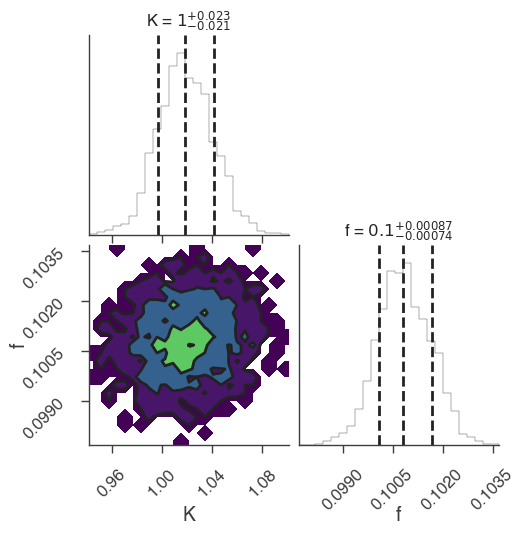

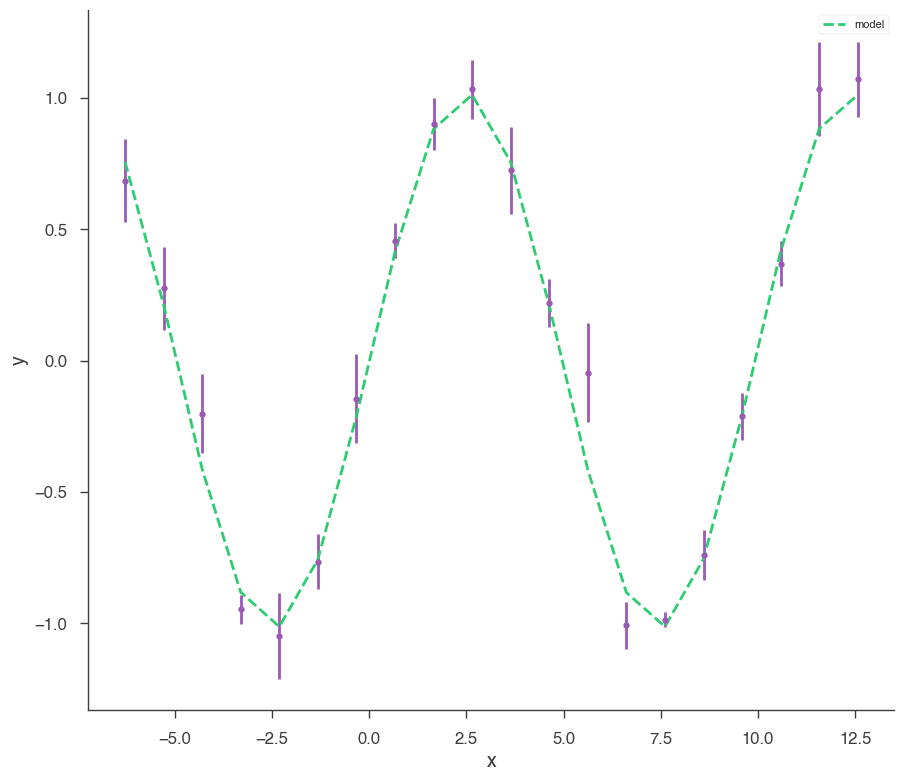

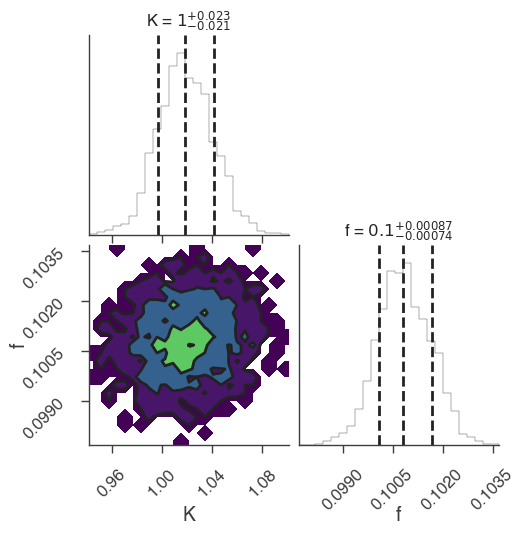

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

09:22:02 INFO      sampler set to dynesty_dynamic                                          ]8;id=381139;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=412478;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

15it [00:00, 149.30it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 16 | eff(%):  2.907 | loglstar:   -inf < -3671.024 <    inf | logz: -3677.962 +/-  0.118 | dlogz: 3779.164 >  0.010]

142it [00:00, 805.68it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 166 | eff(%): 21.321 | loglstar:   -inf < -2134.129 <    inf | logz: -2141.290 +/-  0.118 | dlogz: 2135.422 >  0.010]

240it [00:00, 882.54it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 321 | eff(%): 29.233 | loglstar:   -inf < -1758.117 <    inf | logz: -1765.502 +/-  0.121 | dlogz: 1761.963 >  0.010]

339it [00:00, 921.61it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 503 | eff(%): 33.799 | loglstar:   -inf < -1513.470 <    inf | logz: -1520.733 +/-  0.115 | dlogz: 1512.342 >  0.010]

432it [00:00, 893.32it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 685 | eff(%): 36.456 | loglstar:   -inf < -1334.863 <    inf | logz: -1341.564 +/-  0.112 | dlogz: 1332.028 >  0.010]

522it [00:00, 796.93it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 932 | eff(%): 36.453 | loglstar:   -inf < -1202.823 <    inf | logz: -1210.383 +/-  0.116 | dlogz: 1201.203 >  0.010]

604it [00:00, 775.24it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1183 | eff(%): 35.888 | loglstar:   -inf < -1111.226 <    inf | logz: -1118.958 +/-  0.118 | dlogz: 1109.658 >  0.010]

683it [00:00, 733.12it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1449 | eff(%): 35.044 | loglstar:   -inf < -1031.888 <    inf | logz: -1039.285 +/-  0.116 | dlogz: 1029.397 >  0.010]

758it [00:01, 633.55it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 1812 | eff(%): 32.785 | loglstar:   -inf < -971.220 <    inf | logz: -977.946 +/-  0.109 | dlogz: 967.256 >  0.010]   

824it [00:01, 629.12it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2093 | eff(%): 31.778 | loglstar:   -inf < -934.631 <    inf | logz: -942.122 +/-  0.117 | dlogz: 932.478 >  0.010]

889it [00:01, 600.53it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2385 | eff(%): 30.815 | loglstar:   -inf < -876.220 <    inf | logz: -883.242 +/-  0.115 | dlogz: 873.024 >  0.010]

951it [00:01, 545.70it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 2737 | eff(%): 29.379 | loglstar:   -inf < -820.750 <    inf | logz: -829.129 +/-  0.122 | dlogz: 819.812 >  0.010]

1007it [00:01, 466.86it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3077 | eff(%): 28.152 | loglstar:   -inf < -759.367 <    inf | logz: -767.548 +/-  0.121 | dlogz: 757.644 >  0.010]

1056it [00:01, 397.27it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3489 | eff(%): 26.473 | loglstar:   -inf < -721.307 <    inf | logz: -728.422 +/-  0.117 | dlogz: 717.786 >  0.010]

1099it [00:01, 358.40it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3823 | eff(%): 25.422 | loglstar:   -inf < -699.782 <    inf | logz: -706.456 +/-  0.112 | dlogz: 695.597 >  0.010]

1137it [00:02, 313.16it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 4185 | eff(%): 24.269 | loglstar:   -inf < -684.915 <    inf | logz: -693.177 +/-  0.123 | dlogz: 682.890 >  0.010]

1171it [00:02, 260.44it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 4623 | eff(%): 22.858 | loglstar:   -inf < -622.989 <    inf | logz: -631.587 +/-  0.126 | dlogz: 621.618 >  0.010]

1200it [00:02, 235.03it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 4972 | eff(%): 21.930 | loglstar:   -inf < -568.392 <    inf | logz: -576.995 +/-  0.125 | dlogz: 566.933 >  0.010] 

1225it [00:02, 227.38it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 5232 | eff(%): 21.371 | loglstar:   -inf < -519.332 <    inf | logz: -527.544 +/-  0.121 | dlogz: 516.869 >  0.010]

1249it [00:02, 222.73it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 5473 | eff(%): 20.911 | loglstar:   -inf < -482.665 <    inf | logz: -491.227 +/-  0.126 | dlogz: 482.991 >  0.010] 

1281it [00:02, 243.25it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 5726 | eff(%): 20.575 | loglstar:   -inf < -430.516 <    inf | logz: -439.717 +/-  0.129 | dlogz: 431.960 >  0.010]

1307it [00:02, 219.99it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 6049 | eff(%): 19.957 | loglstar:   -inf < -397.778 <    inf | logz: -406.970 +/-  0.132 | dlogz: 399.491 >  0.010]

1330it [00:03, 186.01it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 6441 | eff(%): 19.162 | loglstar:   -inf < -373.397 <    inf | logz: -382.485 +/-  0.127 | dlogz: 374.168 >  0.010]

1350it [00:03, 176.71it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 6779 | eff(%): 18.547 | loglstar:   -inf < -355.698 <    inf | logz: -363.728 +/-  0.124 | dlogz: 354.728 >  0.010]

1369it [00:03, 165.79it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 7140 | eff(%): 17.919 | loglstar:   -inf < -333.456 <    inf | logz: -342.156 +/-  0.130 | dlogz: 333.760 >  0.010]

1387it [00:03, 160.67it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 7454 | eff(%): 17.438 | loglstar:   -inf < -322.258 <    inf | logz: -331.102 +/-  0.123 | dlogz: 322.235 >  0.010]

1404it [00:03, 147.85it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 7819 | eff(%): 16.877 | loglstar:   -inf < -309.337 <    inf | logz: -317.362 +/-  0.120 | dlogz: 308.114 >  0.010] 

1419it [00:03, 126.52it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 8225 | eff(%): 16.264 | loglstar:   -inf < -300.520 <    inf | logz: -309.060 +/-  0.125 | dlogz: 300.160 >  0.010]

1434it [00:03, 128.96it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 8474 | eff(%): 15.979 | loglstar:   -inf < -290.747 <    inf | logz: -298.727 +/-  0.119 | dlogz: 289.394 >  0.010]

1451it [00:04, 138.12it/s, batch: 0 | bound: 0 | nc: 51 | ncall: 8793 | eff(%): 15.614 | loglstar:   -inf < -279.822 <    inf | logz: -287.711 +/-  0.121 | dlogz: 278.359 >  0.010]

1469it [00:04, 141.86it/s, batch: 0 | bound: 0 | nc: 61 | ncall: 9062 | eff(%): 15.363 | loglstar:   -inf < -271.866 <    inf | logz: -280.350 +/-  0.123 | dlogz: 271.196 >  0.010]

1488it [00:04, 153.92it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 9326 | eff(%): 15.143 | loglstar:   -inf < -259.332 <    inf | logz: -267.383 +/-  0.123 | dlogz: 257.987 >  0.010] 

1504it [00:04, 147.89it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 9588 | eff(%): 14.909 | loglstar:   -inf < -251.039 <    inf | logz: -258.674 +/-  0.121 | dlogz: 249.099 >  0.010]

1520it [00:04, 138.91it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 9877 | eff(%): 14.648 | loglstar:   -inf < -243.544 <    inf | logz: -252.185 +/-  0.124 | dlogz: 242.910 >  0.010] 

1535it [00:04, 120.76it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 10255 | eff(%): 14.272 | loglstar:   -inf < -236.927 <    inf | logz: -245.396 +/-  0.121 | dlogz: 235.936 >  0.010]

1548it [00:04, 121.98it/s, batch: 0 | bound: 0 | nc: 55 | ncall: 10488 | eff(%): 14.088 | loglstar:   -inf < -230.925 <    inf | logz: -239.689 +/-  0.124 | dlogz: 230.397 >  0.010]

1561it [00:04, 117.21it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 10755 | eff(%): 13.869 | loglstar:   -inf < -226.015 <    inf | logz: -234.283 +/-  0.123 | dlogz: 224.725 >  0.010]

1574it [00:05, 120.13it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 11019 | eff(%): 13.664 | loglstar:   -inf < -218.025 <    inf | logz: -226.897 +/-  0.126 | dlogz: 217.628 >  0.010] 

1587it [00:05, 104.79it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 11382 | eff(%): 13.356 | loglstar:   -inf < -210.954 <    inf | logz: -219.296 +/-  0.125 | dlogz: 209.731 >  0.010]

1598it [00:05, 99.03it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 11668 | eff(%): 13.133 | loglstar:   -inf < -206.424 <    inf | logz: -214.742 +/-  0.122 | dlogz: 205.100 >  0.010]

1611it [00:05, 98.53it/s, batch: 0 | bound: 0 | nc: 78 | ncall: 11958 | eff(%): 12.931 | loglstar:   -inf < -201.626 <    inf | logz: -209.776 +/-  0.121 | dlogz: 200.021 >  0.010]

1627it [00:05, 110.36it/s, batch: 0 | bound: 0 | nc: 51 | ncall: 12196 | eff(%): 12.815 | loglstar:   -inf < -196.370 <    inf | logz: -204.625 +/-  0.122 | dlogz: 194.907 >  0.010]

1643it [00:05, 121.96it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 12515 | eff(%): 12.624 | loglstar:   -inf < -189.703 <    inf | logz: -197.819 +/-  0.122 | dlogz: 188.013 >  0.010]

1656it [00:05, 103.93it/s, batch: 0 | bound: 0 | nc: 67 | ncall: 12898 | eff(%): 12.360 | loglstar:   -inf < -186.244 <    inf | logz: -194.000 +/-  0.119 | dlogz: 184.079 >  0.010]

1677it [00:05, 126.11it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 13237 | eff(%): 12.208 | loglstar:   -inf < -180.249 <    inf | logz: -189.402 +/-  0.122 | dlogz: 179.744 >  0.010]

1691it [00:06, 117.70it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 13590 | eff(%): 12.001 | loglstar:   -inf < -175.312 <    inf | logz: -183.836 +/-  0.123 | dlogz: 173.979 >  0.010]

1704it [00:06, 112.93it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 13899 | eff(%): 11.834 | loglstar:   -inf < -171.948 <    inf | logz: -180.193 +/-  0.120 | dlogz: 170.217 >  0.010]

1716it [00:06, 114.38it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 14156 | eff(%): 11.709 | loglstar:   -inf < -168.409 <    inf | logz: -176.648 +/-  0.123 | dlogz: 166.682 >  0.010]

1728it [00:06, 110.05it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 14484 | eff(%): 11.532 | loglstar:   -inf < -163.800 <    inf | logz: -172.962 +/-  0.125 | dlogz: 163.248 >  0.010] 

1740it [00:06, 103.22it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 14809 | eff(%): 11.366 | loglstar:   -inf < -159.895 <    inf | logz: -168.552 +/-  0.123 | dlogz: 158.616 >  0.010]

1751it [00:06, 103.48it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 15059 | eff(%): 11.254 | loglstar:   -inf < -156.807 <    inf | logz: -165.239 +/-  0.122 | dlogz: 155.218 >  0.010]

1762it [00:06, 102.75it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 15304 | eff(%): 11.149 | loglstar:   -inf < -153.290 <    inf | logz: -162.052 +/-  0.124 | dlogz: 152.172 >  0.010]

1773it [00:06, 101.41it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 15672 | eff(%): 10.963 | loglstar:   -inf < -149.231 <    inf | logz: -158.687 +/-  0.126 | dlogz: 148.908 >  0.010]

1784it [00:07, 88.39it/s, batch: 0 | bound: 0 | nc: 44 | ncall: 16044 | eff(%): 10.783 | loglstar:   -inf < -146.582 <    inf | logz: -154.914 +/-  0.122 | dlogz: 144.776 >  0.010] 

1794it [00:07, 84.18it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 16345 | eff(%): 10.650 | loglstar:   -inf < -143.770 <    inf | logz: -152.255 +/-  0.122 | dlogz: 142.145 >  0.010]

1804it [00:07, 86.61it/s, batch: 0 | bound: 0 | nc: 51 | ncall: 16633 | eff(%): 10.529 | loglstar:   -inf < -141.704 <    inf | logz: -149.910 +/-  0.121 | dlogz: 139.708 >  0.010]

1813it [00:07, 69.76it/s, batch: 0 | bound: 0 | nc: 169 | ncall: 17088 | eff(%): 10.308 | loglstar:   -inf < -138.703 <    inf | logz: -147.290 +/-  0.123 | dlogz: 137.139 >  0.010]

1822it [00:07, 72.93it/s, batch: 0 | bound: 0 | nc: 45 | ncall: 17333 | eff(%): 10.217 | loglstar:   -inf < -135.883 <    inf | logz: -144.637 +/-  0.125 | dlogz: 134.567 >  0.010] 

1830it [00:07, 65.60it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 17695 | eff(%): 10.058 | loglstar:   -inf < -133.879 <    inf | logz: -141.976 +/-  0.123 | dlogz: 131.704 >  0.010]

1837it [00:08, 44.58it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17831 | eff(%): 10.021 | loglstar:   -inf < -131.567 <    inf | logz: -140.303 +/-  0.123 | dlogz: 130.174 >  0.010] 

1942it [00:08, 226.91it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17970 | eff(%): 10.514 | loglstar:   -inf < -111.180 <    inf | logz: -119.831 +/-  0.123 | dlogz: 109.727 >  0.010]

2036it [00:08, 372.25it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 18113 | eff(%): 10.939 | loglstar:   -inf < -92.334 <    inf | logz: -100.546 +/-  0.122 | dlogz: 90.158 >  0.010]  

2142it [00:08, 526.63it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18288 | eff(%): 11.401 | loglstar:   -inf < -76.870 <    inf | logz: -84.805 +/-  0.120 | dlogz: 74.152 >  0.010] 

2227it [00:08, 604.85it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18487 | eff(%): 11.729 | loglstar:   -inf < -64.948 <    inf | logz: -73.655 +/-  0.125 | dlogz: 63.072 >  0.010]

2300it [00:08, 423.75it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18634 | eff(%): 12.020 | loglstar:   -inf < -57.485 <    inf | logz: -65.764 +/-  0.123 | dlogz: 54.969 >  0.010]

2405it [00:08, 547.12it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18777 | eff(%): 12.476 | loglstar:   -inf < -47.352 <    inf | logz: -56.105 +/-  0.123 | dlogz: 45.113 >  0.010]

2528it [00:08, 696.77it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18975 | eff(%): 12.981 | loglstar:   -inf < -38.535 <    inf | logz: -47.196 +/-  0.122 | dlogz: 35.930 >  0.010]

2616it [00:09, 714.52it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 19195 | eff(%): 13.283 | loglstar:   -inf < -33.449 <    inf | logz: -41.872 +/-  0.123 | dlogz: 30.413 >  0.010]

2701it [00:09, 470.75it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19375 | eff(%): 13.590 | loglstar:   -inf < -29.275 <    inf | logz: -37.782 +/-  0.123 | dlogz: 26.150 >  0.010]

2800it [00:09, 565.01it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19508 | eff(%): 13.994 | loglstar:   -inf < -25.558 <    inf | logz: -34.091 +/-  0.122 | dlogz: 22.253 >  0.010]

2898it [00:09, 648.49it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19680 | eff(%): 14.361 | loglstar:   -inf < -21.921 <    inf | logz: -30.515 +/-  0.124 | dlogz: 18.477 >  0.010]

2986it [00:09, 699.63it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19821 | eff(%): 14.694 | loglstar:   -inf < -19.640 <    inf | logz: -28.073 +/-  0.122 | dlogz: 15.849 >  0.010]

3070it [00:09, 703.41it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19998 | eff(%): 14.977 | loglstar:   -inf < -17.563 <    inf | logz: -26.208 +/-  0.123 | dlogz: 13.818 >  0.010]

3151it [00:10, 464.01it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20143 | eff(%): 15.264 | loglstar:   -inf < -15.780 <    inf | logz: -24.358 +/-  0.123 | dlogz: 11.802 >  0.010]

3252it [00:10, 563.32it/s, batch: 0 | bound: 4 | nc: 5 | ncall: 20284 | eff(%): 15.647 | loglstar:   -inf < -14.082 <    inf | logz: -22.609 +/-  0.123 | dlogz:  9.846 >  0.010]

3346it [00:10, 641.33it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20424 | eff(%): 15.991 | loglstar:   -inf < -12.665 <    inf | logz: -21.246 +/-  0.123 | dlogz:  8.293 >  0.010]

3448it [00:10, 727.36it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 20624 | eff(%): 16.323 | loglstar:   -inf < -11.469 <    inf | logz: -20.021 +/-  0.123 | dlogz:  6.863 >  0.010]

3535it [00:10, 729.70it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20831 | eff(%): 16.572 | loglstar:   -inf < -10.686 <    inf | logz: -19.181 +/-  0.123 | dlogz:  5.848 >  0.010]

3618it [00:10, 524.30it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20932 | eff(%): 16.881 | loglstar:   -inf < -10.117 <    inf | logz: -18.568 +/-  0.122 | dlogz:  5.076 >  0.010]

3719it [00:10, 620.91it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 21073 | eff(%): 17.239 | loglstar:   -inf < -9.445 <    inf | logz: -17.935 +/-  0.122 | dlogz:  4.248 >  0.010] 

3812it [00:11, 688.08it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 21222 | eff(%): 17.549 | loglstar:   -inf < -8.900 <    inf | logz: -17.446 +/-  0.122 | dlogz:  3.586 >  0.010]

3894it [00:11, 717.41it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 21378 | eff(%): 17.799 | loglstar:   -inf < -8.508 <    inf | logz: -17.055 +/-  0.123 | dlogz:  3.051 >  0.010]

3976it [00:11, 707.78it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21562 | eff(%): 18.022 | loglstar:   -inf < -8.130 <    inf | logz: -16.728 +/-  0.123 | dlogz:  2.589 >  0.010]

4054it [00:11, 484.96it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21659 | eff(%): 18.295 | loglstar:   -inf < -7.871 <    inf | logz: -16.452 +/-  0.123 | dlogz:  2.197 >  0.010]

4169it [00:11, 615.74it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21808 | eff(%): 18.688 | loglstar:   -inf < -7.533 <    inf | logz: -16.121 +/-  0.123 | dlogz:  1.717 >  0.010]

4252it [00:11, 662.56it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 21953 | eff(%): 18.937 | loglstar:   -inf < -7.325 <    inf | logz: -15.923 +/-  0.123 | dlogz:  1.429 >  0.010]

4354it [00:11, 747.25it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22142 | eff(%): 19.230 | loglstar:   -inf < -7.151 <    inf | logz: -15.721 +/-  0.123 | dlogz:  1.136 >  0.010]

4445it [00:12, 493.34it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22342 | eff(%): 19.460 | loglstar:   -inf < -7.012 <    inf | logz: -15.576 +/-  0.123 | dlogz:  0.926 >  0.010]

4565it [00:12, 623.77it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22489 | eff(%): 19.857 | loglstar:   -inf < -6.864 <    inf | logz: -15.420 +/-  0.123 | dlogz:  0.706 >  0.010]

4671it [00:12, 714.18it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22628 | eff(%): 20.196 | loglstar:   -inf < -6.765 <    inf | logz: -15.312 +/-  0.123 | dlogz:  0.556 >  0.010]

4764it [00:12, 762.43it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 22793 | eff(%): 20.452 | loglstar:   -inf < -6.674 <    inf | logz: -15.234 +/-  0.123 | dlogz:  0.452 >  0.010]

4863it [00:12, 817.83it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23013 | eff(%): 20.682 | loglstar:   -inf < -6.603 <    inf | logz: -15.165 +/-  0.123 | dlogz:  0.363 >  0.010]

4957it [00:12, 530.36it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23165 | eff(%): 20.947 | loglstar:   -inf < -6.549 <    inf | logz: -15.111 +/-  0.123 | dlogz:  0.296 >  0.010]

5085it [00:13, 670.98it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23328 | eff(%): 21.340 | loglstar:   -inf < -6.480 <    inf | logz: -15.052 +/-  0.123 | dlogz:  0.224 >  0.010]

5175it [00:13, 707.58it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23492 | eff(%): 21.570 | loglstar:   -inf < -6.448 <    inf | logz: -15.018 +/-  0.123 | dlogz:  0.185 >  0.010]

5263it [00:13, 709.51it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23686 | eff(%): 21.761 | loglstar:   -inf < -6.420 <    inf | logz: -14.990 +/-  0.123 | dlogz:  0.153 >  0.010]

5346it [00:13, 480.02it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23867 | eff(%): 21.940 | loglstar:   -inf < -6.396 <    inf | logz: -14.969 +/-  0.123 | dlogz:  0.129 >  0.010]

5485it [00:13, 644.34it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24055 | eff(%): 22.338 | loglstar:   -inf < -6.368 <    inf | logz: -14.939 +/-  0.123 | dlogz:  0.096 >  0.010]

5582it [00:13, 709.82it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 24199 | eff(%): 22.600 | loglstar:   -inf < -6.353 <    inf | logz: -14.923 +/-  0.123 | dlogz:  0.079 >  0.010]

5691it [00:13, 792.09it/s, batch: 0 | bound: 9 | nc: 6 | ncall: 24417 | eff(%): 22.840 | loglstar:   -inf < -6.339 <    inf | logz: -14.908 +/-  0.123 | dlogz:  0.063 >  0.010]

5787it [00:14, 536.61it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24609 | eff(%): 23.048 | loglstar:   -inf < -6.326 <    inf | logz: -14.898 +/-  0.123 | dlogz:  0.052 >  0.010]

5887it [00:14, 620.04it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24742 | eff(%): 23.322 | loglstar:   -inf < -6.316 <    inf | logz: -14.889 +/-  0.123 | dlogz:  0.042 >  0.010]

5971it [00:14, 664.63it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24889 | eff(%): 23.518 | loglstar:   -inf < -6.309 <    inf | logz: -14.882 +/-  0.123 | dlogz:  0.035 >  0.010]

6054it [00:14, 700.35it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25034 | eff(%): 23.710 | loglstar:   -inf < -6.304 <    inf | logz: -14.877 +/-  0.123 | dlogz:  0.030 >  0.010]

6137it [00:14, 699.88it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25219 | eff(%): 23.862 | loglstar:   -inf < -6.300 <    inf | logz: -14.872 +/-  0.123 | dlogz:  0.025 >  0.010]

6216it [00:15, 439.45it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25376 | eff(%): 24.022 | loglstar:   -inf < -6.296 <    inf | logz: -14.869 +/-  0.123 | dlogz:  0.022 >  0.010]

6323it [00:15, 552.13it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25509 | eff(%): 24.311 | loglstar:   -inf < -6.292 <    inf | logz: -14.865 +/-  0.123 | dlogz:  0.017 >  0.010]

6418it [00:15, 632.09it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25649 | eff(%): 24.544 | loglstar:   -inf < -6.289 <    inf | logz: -14.862 +/-  0.123 | dlogz:  0.014 >  0.010]

6508it [00:15, 691.43it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25794 | eff(%): 24.751 | loglstar:   -inf < -6.287 <    inf | logz: -14.859 +/-  0.123 | dlogz:  0.012 >  0.010]

6592it [00:15, 699.57it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25973 | eff(%): 24.901 | loglstar:   -inf < -6.286 <    inf | logz: -14.857 +/-  0.123 | dlogz:  0.010 >  0.010]

7004it [00:15, 1555.52it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 26393 | eff(%): 26.443 | loglstar:   -inf < -6.278 <    inf | logz: -14.849 +/-  0.123 | dlogz:  0.002 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7184it [00:16, 420.25it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 26592 | eff(%): 26.478 | loglstar: -8.106 < -7.799 < -6.803 | logz: -14.847 +/-  0.126 | stop:  1.571]            

7315it [00:16, 466.98it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26789 | eff(%): 26.766 | loglstar: -8.106 < -7.429 < -6.803 | logz: -14.847 +/-  0.126 | stop:  1.571]

7429it [00:17, 497.09it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27029 | eff(%): 26.947 | loglstar: -8.106 < -7.192 < -6.803 | logz: -14.847 +/-  0.126 | stop:  1.571]

7528it [00:17, 410.39it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 27280 | eff(%): 27.060 | loglstar: -8.106 < -7.036 < -6.803 | logz: -14.847 +/-  0.126 | stop:  1.571]

7606it [00:17, 452.41it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27375 | eff(%): 27.247 | loglstar: -8.106 < -6.929 < -6.803 | logz: -14.847 +/-  0.126 | stop:  1.571]

7683it [00:17, 495.79it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27482 | eff(%): 27.418 | loglstar: -8.106 < -6.840 < -6.803 | logz: -14.847 +/-  0.126 | stop:  1.571]

7946it [00:17, 851.53it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27780 | eff(%): 28.298 | loglstar: -8.106 < -6.550 < -6.803 | logz: -14.847 +/-  0.126 | stop:  1.571]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8224it [00:18, 483.82it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28080 | eff(%): 29.288 | loglstar: -8.575 < -6.328 < -8.106 | logz: -14.840 +/-  0.104 | stop:  1.220]

8327it [00:19, 364.14it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28195 | eff(%): 28.967 | loglstar: -8.575 < -8.141 < -8.106 | logz: -14.840 +/-  0.104 | stop:  1.220]

8710it [00:19, 664.61it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28616 | eff(%): 30.286 | loglstar: -8.575 < -6.756 < -8.106 | logz: -14.840 +/-  0.104 | stop:  1.220]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8879it [00:20, 328.19it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28810 | eff(%): 30.274 | loglstar: -8.991 < -8.761 < -8.573 | logz: -14.847 +/-  0.097 | stop:  1.010]

9177it [00:20, 493.39it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29128 | eff(%): 31.240 | loglstar: -8.991 < -7.478 < -8.573 | logz: -14.847 +/-  0.097 | stop:  1.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9416it [00:21, 384.91it/s, batch: 4 | bound: 0 | nc: 1 | ncall: 29376 | eff(%): 32.053 | loglstar: -9.364 < -7.472 < -8.986 | logz: -14.851 +/-  0.092 | stop:  1.006]

9546it [00:22, 339.58it/s, batch: 4 | bound: 2 | nc: 1 | ncall: 29519 | eff(%): 31.860 | loglstar: -9.364 < -8.636 < -8.986 | logz: -14.851 +/-  0.092 | stop:  1.006]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9969it [00:23, 414.22it/s, batch: 4 | bound: 2 | nc: 1 | ncall: 29962 | eff(%): 33.272 | loglstar: -9.364 < -6.281 < -8.986 | logz: -14.851 +/-  0.092 | stop:  0.832]

9969it [00:23, 431.69it/s, batch: 4 | bound: 2 | nc: 1 | ncall: 29962 | eff(%): 33.272 | loglstar: -9.364 < -6.281 < -8.986 | logz: -14.851 +/-  0.092 | stop:  0.832]

09:22:26 INFO      fit restored to maximum of posterior                                         ]8;id=246116;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=415358;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=785663;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=815953;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.018 +/- 0.022,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.294548
total,-6.294548


Values of statistical measures:

,statistical measures
AIC,17.294977
BIC,18.580560
DIC,16.634050
PDIC,2.022349
log(Z),-6.451055


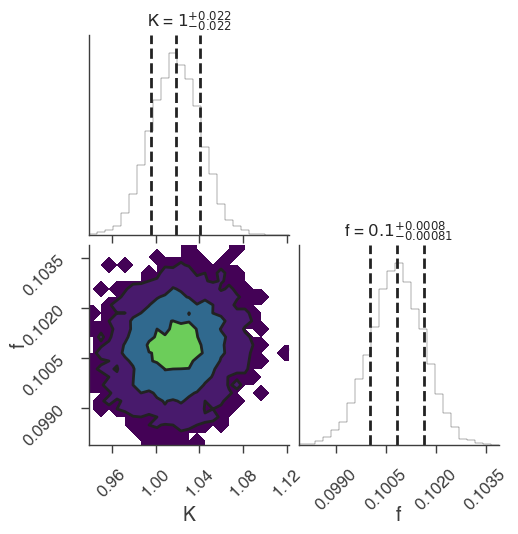

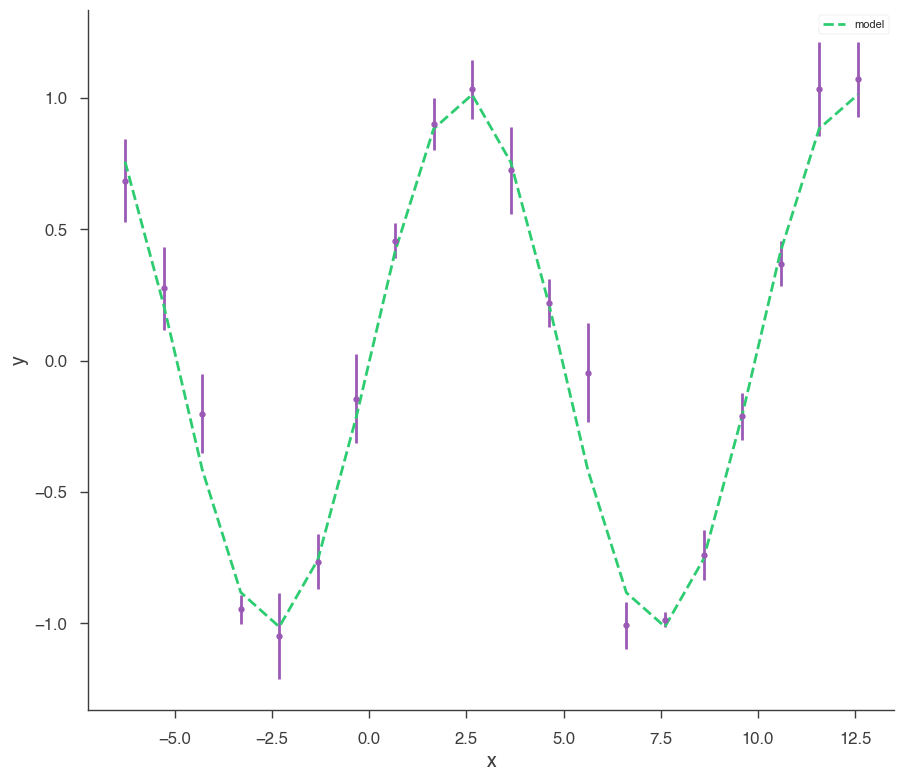

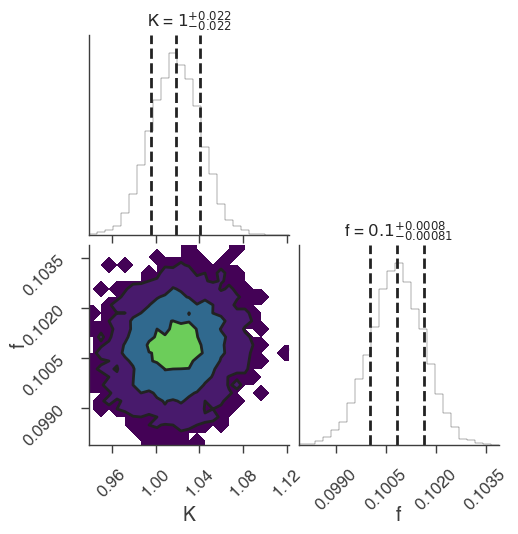

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

09:22:27 INFO      sampler set to zeus                                                     ]8;id=195083;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=221133;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:20, 30.30it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:23, 25.80it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:21, 28.84it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:19, 30.51it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:19, 30.98it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:18, 32.29it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:18, 33.10it/s]

Sampling progress :   5%|▌         | 32/625 [00:01<00:17, 34.23it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:17, 34.07it/s]

Sampling progress :   7%|▋         | 41/625 [00:01<00:16, 36.23it/s]

Sampling progress :   7%|▋         | 45/625 [00:01<00:16, 35.93it/s]

Sampling progress :   8%|▊         | 49/625 [00:01<00:16, 35.34it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:16, 35.59it/s]

Sampling progress :   9%|▉         | 58/625 [00:01<00:15, 37.38it/s]

Sampling progress :  10%|▉         | 62/625 [00:01<00:15, 36.09it/s]

Sampling progress :  11%|█         | 66/625 [00:01<00:15, 35.90it/s]

Sampling progress :  11%|█         | 70/625 [00:02<00:15, 36.10it/s]

Sampling progress :  12%|█▏        | 74/625 [00:02<00:15, 36.39it/s]

Sampling progress :  12%|█▏        | 78/625 [00:02<00:15, 36.37it/s]

Sampling progress :  13%|█▎        | 82/625 [00:02<00:15, 35.83it/s]

Sampling progress :  14%|█▍        | 86/625 [00:02<00:15, 35.45it/s]

Sampling progress :  14%|█▍        | 90/625 [00:02<00:14, 35.76it/s]

Sampling progress :  15%|█▌        | 94/625 [00:02<00:14, 35.42it/s]

Sampling progress :  16%|█▌        | 98/625 [00:02<00:14, 35.56it/s]

Sampling progress :  16%|█▋        | 102/625 [00:02<00:14, 35.75it/s]

Sampling progress :  17%|█▋        | 106/625 [00:03<00:14, 35.24it/s]

Sampling progress :  18%|█▊        | 110/625 [00:03<00:14, 35.03it/s]

Sampling progress :  18%|█▊        | 114/625 [00:03<00:14, 35.00it/s]

Sampling progress :  19%|█▉        | 118/625 [00:03<00:14, 35.81it/s]

Sampling progress :  20%|█▉        | 122/625 [00:03<00:14, 35.45it/s]

Sampling progress :  20%|██        | 126/625 [00:03<00:14, 35.30it/s]

Sampling progress :  21%|██        | 130/625 [00:03<00:14, 35.02it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:14, 34.98it/s]

Sampling progress :  22%|██▏       | 138/625 [00:03<00:13, 35.27it/s]

Sampling progress :  23%|██▎       | 142/625 [00:04<00:14, 34.50it/s]

Sampling progress :  23%|██▎       | 146/625 [00:04<00:13, 34.98it/s]

Sampling progress :  24%|██▍       | 150/625 [00:04<00:14, 33.26it/s]

Sampling progress :  25%|██▍       | 154/625 [00:04<00:14, 32.65it/s]

Sampling progress :  25%|██▌       | 158/625 [00:04<00:13, 34.12it/s]

Sampling progress :  26%|██▌       | 162/625 [00:04<00:13, 34.13it/s]

Sampling progress :  27%|██▋       | 166/625 [00:04<00:13, 33.98it/s]

Sampling progress :  27%|██▋       | 171/625 [00:04<00:12, 36.16it/s]

Sampling progress :  28%|██▊       | 175/625 [00:05<00:12, 35.77it/s]

Sampling progress :  29%|██▊       | 179/625 [00:05<00:12, 35.20it/s]

Sampling progress :  29%|██▉       | 183/625 [00:05<00:13, 33.86it/s]

Sampling progress :  30%|██▉       | 187/625 [00:05<00:12, 35.18it/s]

Sampling progress :  31%|███       | 191/625 [00:05<00:12, 35.63it/s]

Sampling progress :  31%|███▏      | 196/625 [00:05<00:11, 38.30it/s]

Sampling progress :  32%|███▏      | 200/625 [00:05<00:11, 37.04it/s]

Sampling progress :  33%|███▎      | 205/625 [00:05<00:10, 38.72it/s]

Sampling progress :  33%|███▎      | 209/625 [00:05<00:10, 38.84it/s]

Sampling progress :  34%|███▍      | 213/625 [00:06<00:10, 38.13it/s]

Sampling progress :  35%|███▍      | 217/625 [00:06<00:11, 35.48it/s]

Sampling progress :  35%|███▌      | 221/625 [00:06<00:11, 35.08it/s]

Sampling progress :  36%|███▌      | 225/625 [00:06<00:11, 34.76it/s]

Sampling progress :  37%|███▋      | 230/625 [00:06<00:10, 37.22it/s]

Sampling progress :  37%|███▋      | 234/625 [00:06<00:10, 36.41it/s]

Sampling progress :  38%|███▊      | 238/625 [00:06<00:10, 36.92it/s]

Sampling progress :  39%|███▊      | 242/625 [00:06<00:10, 37.21it/s]

Sampling progress :  40%|███▉      | 247/625 [00:06<00:09, 38.22it/s]

Sampling progress :  40%|████      | 252/625 [00:07<00:09, 39.61it/s]

Sampling progress :  41%|████      | 256/625 [00:07<00:09, 39.16it/s]

Sampling progress :  42%|████▏     | 260/625 [00:07<00:09, 38.81it/s]

Sampling progress :  42%|████▏     | 264/625 [00:07<00:09, 37.65it/s]

Sampling progress :  43%|████▎     | 268/625 [00:07<00:09, 37.38it/s]

Sampling progress :  44%|████▎     | 272/625 [00:07<00:09, 36.25it/s]

Sampling progress :  44%|████▍     | 276/625 [00:07<00:09, 35.48it/s]

Sampling progress :  45%|████▍     | 280/625 [00:07<00:09, 35.86it/s]

Sampling progress :  45%|████▌     | 284/625 [00:08<00:09, 35.21it/s]

Sampling progress :  46%|████▌     | 288/625 [00:08<00:09, 34.59it/s]

Sampling progress :  47%|████▋     | 292/625 [00:08<00:09, 33.65it/s]

Sampling progress :  47%|████▋     | 296/625 [00:08<00:09, 35.20it/s]

Sampling progress :  48%|████▊     | 300/625 [00:08<00:09, 35.43it/s]

Sampling progress :  49%|████▊     | 304/625 [00:08<00:09, 34.85it/s]

Sampling progress :  49%|████▉     | 308/625 [00:08<00:08, 35.41it/s]

Sampling progress :  50%|████▉     | 312/625 [00:08<00:08, 35.48it/s]

Sampling progress :  51%|█████     | 316/625 [00:08<00:08, 34.54it/s]

Sampling progress :  51%|█████     | 320/625 [00:09<00:08, 35.83it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:09<00:08, 36.08it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:09<00:08, 36.31it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:09<00:08, 34.49it/s]

Sampling progress :  54%|█████▍    | 337/625 [00:09<00:07, 37.38it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:09<00:07, 39.42it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:09<00:07, 37.14it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:09<00:07, 37.88it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:09<00:06, 38.92it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:10<00:06, 38.33it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:10<00:06, 37.46it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:10<00:06, 38.59it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:10<00:07, 32.97it/s]

Sampling progress :  60%|██████    | 377/625 [00:10<00:06, 35.55it/s]

Sampling progress :  61%|██████    | 381/625 [00:10<00:07, 33.55it/s]

Sampling progress :  62%|██████▏   | 385/625 [00:10<00:07, 33.79it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:10<00:06, 35.05it/s]

Sampling progress :  63%|██████▎   | 393/625 [00:11<00:06, 36.22it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:11<00:06, 36.16it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:11<00:06, 35.15it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:11<00:06, 34.88it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:11<00:05, 36.96it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:11<00:05, 38.87it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:11<00:05, 38.37it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:11<00:05, 37.45it/s]

Sampling progress :  68%|██████▊   | 427/625 [00:11<00:05, 36.77it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:12<00:05, 35.25it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:12<00:05, 34.43it/s]

Sampling progress :  70%|███████   | 439/625 [00:12<00:05, 35.46it/s]

Sampling progress :  71%|███████   | 443/625 [00:12<00:05, 35.59it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:12<00:05, 34.18it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:12<00:05, 34.43it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:12<00:04, 34.97it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:12<00:04, 35.06it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:13<00:04, 33.98it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:13<00:04, 34.71it/s]

Sampling progress :  76%|███████▌  | 472/625 [00:13<00:04, 37.11it/s]

Sampling progress :  76%|███████▌  | 476/625 [00:13<00:04, 36.65it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:13<00:03, 37.38it/s]

Sampling progress :  77%|███████▋  | 484/625 [00:13<00:03, 37.56it/s]

Sampling progress :  78%|███████▊  | 489/625 [00:13<00:03, 38.75it/s]

Sampling progress :  79%|███████▉  | 493/625 [00:13<00:03, 38.31it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:13<00:03, 36.55it/s]

Sampling progress :  80%|████████  | 501/625 [00:14<00:03, 37.41it/s]

Sampling progress :  81%|████████  | 505/625 [00:14<00:03, 37.31it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:14<00:03, 36.69it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:14<00:03, 36.40it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:14<00:02, 36.25it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:14<00:02, 36.12it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:14<00:02, 35.86it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:14<00:02, 35.12it/s]

Sampling progress :  85%|████████▌ | 533/625 [00:14<00:02, 34.51it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:15<00:02, 34.55it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:15<00:02, 32.55it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:15<00:02, 30.16it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:15<00:02, 31.40it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:15<00:02, 33.05it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:15<00:01, 34.16it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:15<00:01, 36.18it/s]

Sampling progress :  91%|█████████ | 566/625 [00:15<00:01, 36.15it/s]

Sampling progress :  91%|█████████ | 570/625 [00:16<00:01, 35.25it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:16<00:01, 34.32it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:16<00:01, 35.25it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:16<00:01, 35.61it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:16<00:01, 36.86it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:16<00:00, 36.52it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:16<00:00, 35.39it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:16<00:00, 35.99it/s]

Sampling progress :  97%|█████████▋| 604/625 [00:16<00:00, 36.85it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:17<00:00, 37.44it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:17<00:00, 39.49it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:17<00:00, 39.10it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:17<00:00, 39.31it/s]

Sampling progress : 100%|██████████| 625/625 [00:17<00:00, 35.73it/s]

09:22:45 INFO      fit restored to maximum of posterior                                         ]8;id=475790;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=604143;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=336362;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=328155;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 23


Scale Factor: 0.991586


Mean Integrated Autocorrelation Time: 3.11


Effective Sample Size: 4013.03


Number of Log Probability Evaluations: 66780


Effective Samples per Log Probability Evaluation: 0.060093


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.018 +/- 0.022,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.294684
total,-6.294684


Values of statistical measures:

,statistical measures
AIC,17.295249
BIC,18.580832
DIC,16.532849
PDIC,1.971713


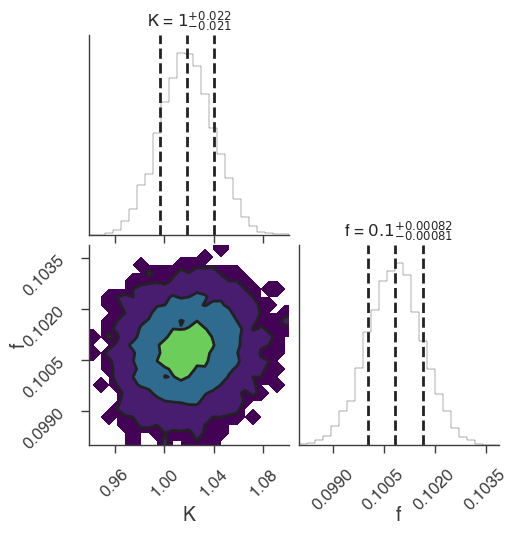

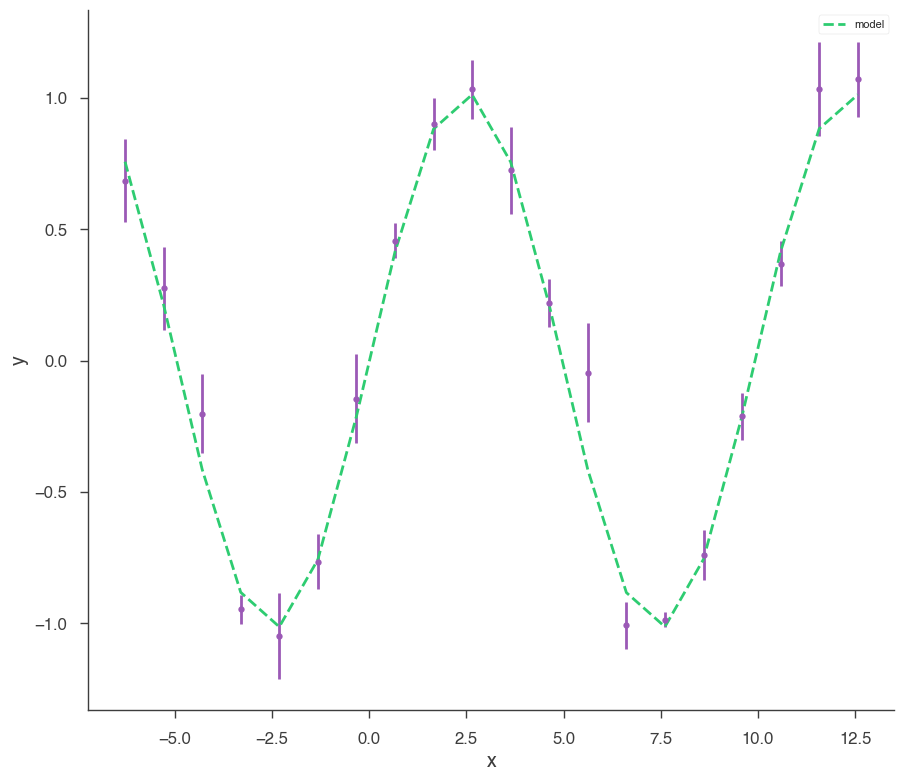

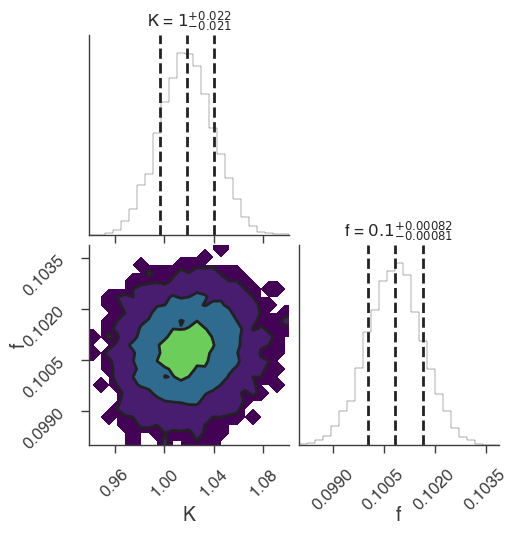

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

09:22:46 INFO      sampler set to ultranest                                                ]8;id=952841;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=8925;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6  


[ultranest] Likelihood function evaluations: 7488


[ultranest]   logZ = -15 +- 0.1065


[ultranest] Effective samples strategy satisfied (ESS = 979.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


09:22:57 INFO      fit restored to maximum of posterior                                         ]8;id=357109;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=827606;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=757197;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=546729;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.020 -0.023 +0.022,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.009 -0.009 +0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.297506
total,-6.297506


Values of statistical measures:

,statistical measures
AIC,17.300894
BIC,18.586476
DIC,16.818397
PDIC,2.113703
log(Z),-6.506972


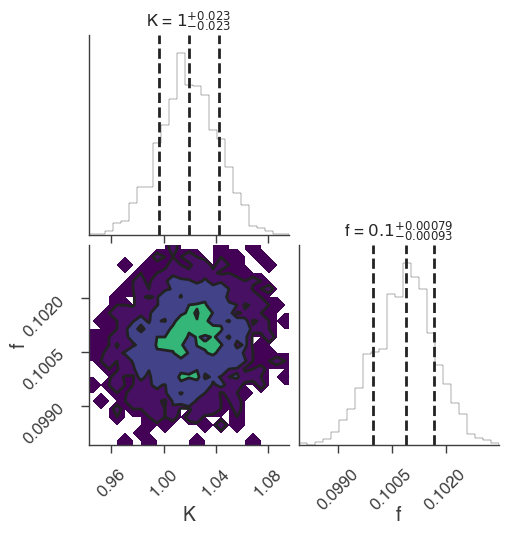

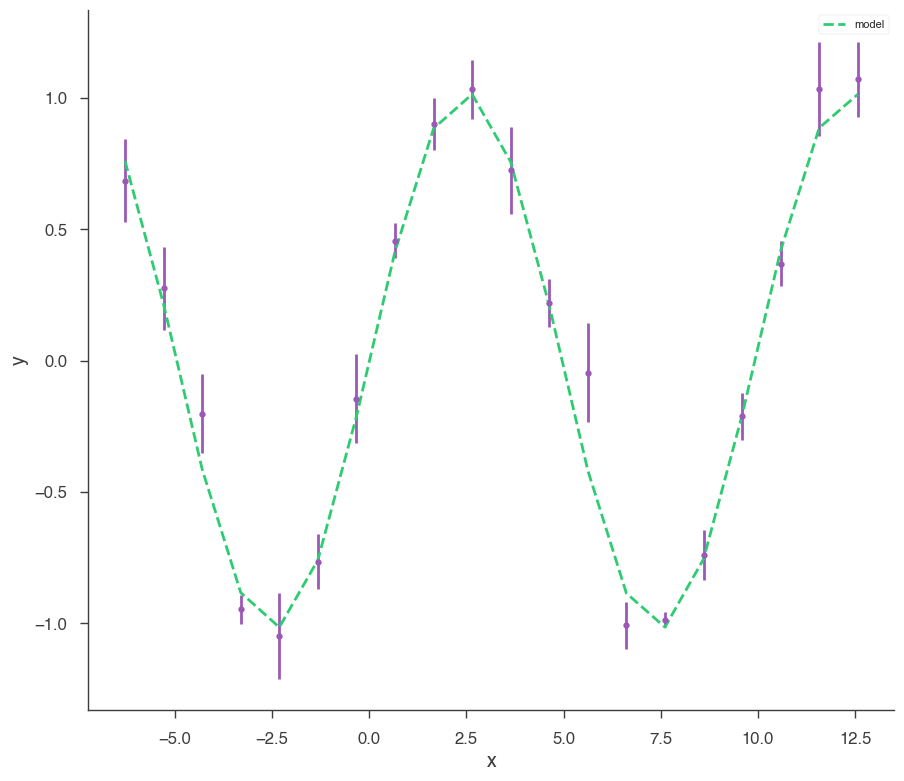

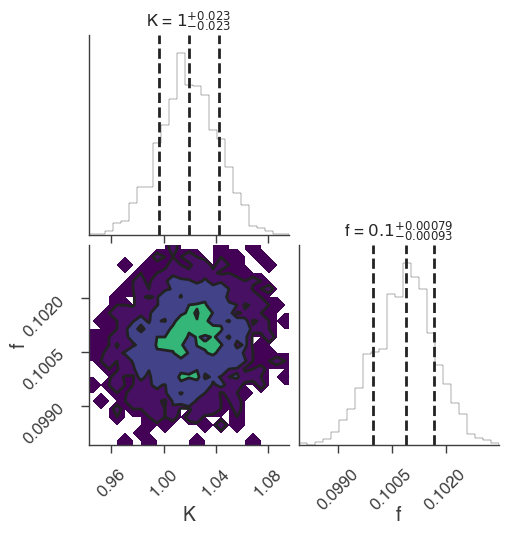

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()